In [3]:
# Imports and confirm files in the dataset folder
import os, pandas as pd, numpy as np
from pathlib import Path

DATA_DIR = Path("GenreClassificationDataset")   # path to the folder you created
print("Files in", DATA_DIR, ":\n", sorted(os.listdir(DATA_DIR)))

Files in GenreClassificationDataset :
 ['description.txt', 'test_data.txt', 'test_data_solution.txt', 'train_data.txt']


In [2]:
# Imports and confirm files in the dataset folder
import os, pandas as pd, numpy as np
from pathlib import Path

DATA_DIR = Path("GenreClassificationDataset")   # path to the folder you created
print("Files in", DATA_DIR, ":\n", sorted(os.listdir(DATA_DIR)))

Files in GenreClassificationDataset :
 ['description.txt', 'test_data.txt', 'test_data_solution.txt', 'train_data.txt']


In [5]:
# Load training data with " ::: " as separator
train_path = DATA_DIR / "train_data.txt"

train_df = pd.read_csv(
    train_path,
    sep=" ::: ",
    header=None,
    engine="python"
)

train_df.columns = ["id", "description", "genre", "extra"]

# Keep only first 3 columns
train_df = train_df.iloc[:, :3]

print("Train shape:", train_df.shape)
train_df.head(10)

Train shape: (54214, 3)


,id,description,genre
0,1,Oscar et la dame rose (2009),drama
1,2,Cupid (1997),thriller
2,3,"Young, Wild and Wonderful (1980)",adult
3,4,The Secret Sin (1915),drama
4,5,The Unrecovered (2007),drama
5,6,Quality Control (2011),documentary
6,7,"""Pink Slip"" (2009)",comedy
7,8,One Step Away (1985),crime
8,9,"""Desperate Hours"" (2016)",reality-tv
9,10,Spirits (2014/I),horror


In [3]:
# Step 4 — Load test data and solution

# Load test data
test_path = DATA_DIR / "test_data.txt"
test_df = pd.read_csv(
    test_path,
    sep=" ::: ",
    header=None,
    engine="python"
)

print("Raw test_df shape:", test_df.shape)
print(test_df.head(5))

# If the file has more than 2 columns, keep only first 2 (id + description)
if test_df.shape[1] > 2:
    test_df = test_df.iloc[:, :2]

test_df.columns = ["id", "description"]
print("Final test_df shape:", test_df.shape)
print(test_df.head(5))

# Load test solutions
sol_path = DATA_DIR / "test_data_solution.txt"
sol_df = pd.read_csv(
    sol_path,
    sep=" ::: ",
    header=None,
    engine="python"
)

# Keep first 2 columns: id + genre
sol_df = sol_df.iloc[:, :2]
sol_df.columns = ["id", "genre"]

print("Solution shape:", sol_df.shape)
print(sol_df.head(5))

# Merge test data with its solutions
test_df = test_df.merge(sol_df, on="id", how="left")
print("After merge:", test_df.shape)
test_df.head(5)

Raw test_df shape: (54200, 3)
   0                            1  \
0  1         Edgar's Lunch (1998)   
1  2     La guerra de papá (1977)   
2  3  Off the Beaten Track (2010)   
3  4       Meu Amigo Hindu (2015)   
4  5            Er nu zhai (1955)   

                                                   2  
0  L.R. Brane loves his life - his car, his apart...  
1  Spain, March 1964: Quico is a very naughty chi...  
2  One year in the life of Albin and his family o...  
3  His father has died, he hasn't spoken with his...  
4  Before he was known internationally as a marti...  
Final test_df shape: (54200, 2)
   id                  description
0   1         Edgar's Lunch (1998)
1   2     La guerra de papá (1977)
2   3  Off the Beaten Track (2010)
3   4       Meu Amigo Hindu (2015)
4   5            Er nu zhai (1955)
Solution shape: (54200, 2)
   id                        genre
0   1         Edgar's Lunch (1998)
1   2     La guerra de papá (1977)
2   3  Off the Beaten Track (2010)
3   4   

,id,description,genre
0,1,Edgar's Lunch (1998),Edgar's Lunch (1998)
1,2,La guerra de papá (1977),La guerra de papá (1977)
2,3,Off the Beaten Track (2010),Off the Beaten Track (2010)
3,4,Meu Amigo Hindu (2015),Meu Amigo Hindu (2015)
4,5,Er nu zhai (1955),Er nu zhai (1955)


In [6]:
# Step 5 — Inspect datasets

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

print("\nUnique genres in train:", train_df['genre'].nunique())
print("Unique genres in test:", test_df['genre'].nunique())

print("\nTop 10 genres in train:\n", train_df['genre'].value_counts().head(10))
print("\nTop 10 genres in test:\n", test_df['genre'].value_counts().head(10))

# Check if any missing values
print("\nMissing values in train:\n", train_df.isna().sum())
print("\nMissing values in test:\n", test_df.isna().sum())

# Show random samples
train_df.sample(5)

Train shape: (54214, 3)
Test shape: (54200, 3)

Unique genres in train: 27
Unique genres in test: 54200

Top 10 genres in train:
 genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
Name: count, dtype: int64

Top 10 genres in test:
 genre
Edgar's Lunch (1998)                1
Relationship with Grannie (????)    1
The Dummy (1995)                    1
Moonlighting (1982)                 1
Beggar on Horseback (1925)          1
Ruhr (2009)                         1
Darling, How Could You! (1951)      1
Octia of the Pink Ocean (2014)      1
Rosie's Miracle (2009)              1
Rona & Nele (2013)                  1
Name: count, dtype: int64

Missing values in train:
 id             0
description    0
genre          0
dtype: int64

Missing values in test:
 id             0
description    0
genre          0
dtype: int64


,id,description,genre
30684,30685,"""About a Girl"" (2007)",comedy
12217,12218,Mi Buenos Aires Querido (2018),documentary
3068,3069,"""Shooters Stance"" (2014)",drama
22481,22482,For Real (2009),drama
6191,6192,Tolko ne oni (2016),comedy


In [7]:
# Step 6 — Clean text data
import re

def clean_text(s):
    if not isinstance(s, str):
        return ""
    s = s.lower()
    s = re.sub(r'http\S+|www\S+', ' ', s)       # remove URLs
    s = re.sub(r'[^a-z0-9\s]', ' ', s)          # remove punctuation
    s = re.sub(r'\s+', ' ', s).strip()          # remove extra spaces
    return s

train_df['clean_text'] = train_df['description'].apply(clean_text)
test_df['clean_text']  = test_df['description'].apply(clean_text)

print("Train shape after cleaning:", train_df.shape)
print("Test shape after cleaning:", test_df.shape)

train_df[['description','clean_text','genre']].head(10)

Train shape after cleaning: (54214, 4)
Test shape after cleaning: (54200, 4)


,description,clean_text,genre
0,Oscar et la dame rose (2009),oscar et la dame rose 2009,drama
1,Cupid (1997),cupid 1997,thriller
2,"Young, Wild and Wonderful (1980)",young wild and wonderful 1980,adult
3,The Secret Sin (1915),the secret sin 1915,drama
4,The Unrecovered (2007),the unrecovered 2007,drama
5,Quality Control (2011),quality control 2011,documentary
6,"""Pink Slip"" (2009)",pink slip 2009,comedy
7,One Step Away (1985),one step away 1985,crime
8,"""Desperate Hours"" (2016)",desperate hours 2016,reality-tv
9,Spirits (2014/I),spirits 2014 i,horror


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Features and labels
X = train_df['clean_text']
y = train_df['genre']

# Split into train/validation (80/20 stratified by genre)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train samples:", len(X_train))
print("Validation samples:", len(X_val))

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2), stop_words="english")

X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf   = tfidf.transform(X_val)
X_test_tfidf  = tfidf.transform(test_df['clean_text'])

print("TF-IDF shapes:")
print("Train:", X_train_tfidf.shape)
print("Validation:", X_val_tfidf.shape)
print("Test:", X_test_tfidf.shape)

Train samples: 43371
Validation samples: 10843
TF-IDF shapes:
Train: (43371, 10000)
Validation: (10843, 10000)
Test: (54200, 10000)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Logistic Regression model
lr = LogisticRegression(
    max_iter=2000,
    solver="lbfgs",
    multi_class="auto"
)
lr.fit(X_train_tfidf, y_train)

# Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

print("✅ Models trained successfully!")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Models trained successfully!



=== Logistic Regression (Validation) ===
Accuracy: 0.3631
              precision    recall  f1-score   support

      action       0.33      0.01      0.01       263
       adult       0.75      0.03      0.05       118
   adventure       1.00      0.01      0.01       155
   animation       0.00      0.00      0.00       100
   biography       0.00      0.00      0.00        53
      comedy       0.28      0.16      0.21      1490
       crime       0.00      0.00      0.00       101
 documentary       0.39      0.63      0.48      2619
       drama       0.34      0.64      0.45      2723
      family       0.22      0.01      0.02       157
     fantasy       0.00      0.00      0.00        65
   game-show       0.00      0.00      0.00        39
     history       0.00      0.00      0.00        49
      horror       0.48      0.20      0.28       441
       music       0.64      0.19      0.29       146
     musical       0.00      0.00      0.00        55
     mystery       0.0

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

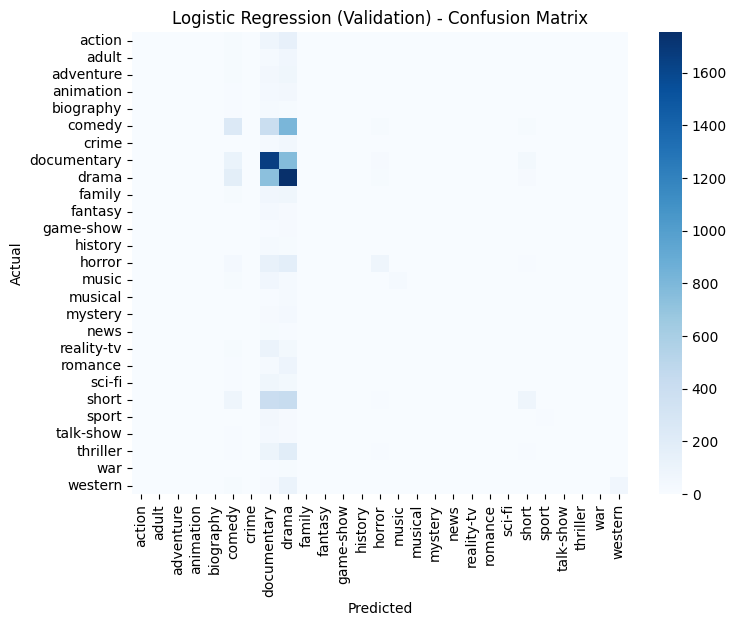


=== Naive Bayes (Validation) ===
Accuracy: 0.3514


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

              precision    recall  f1-score   support

      action       1.00      0.00      0.01       263
       adult       0.00      0.00      0.00       118
   adventure       0.00      0.00      0.00       155
   animation       0.00      0.00      0.00       100
   biography       0.00      0.00      0.00        53
      comedy       0.33      0.11      0.17      1490
       crime       0.00      0.00      0.00       101
 documentary       0.37      0.67      0.48      2619
       drama       0.33      0.67      0.44      2723
      family       1.00      0.01      0.01       157
     fantasy       0.00      0.00      0.00        65
   game-show       0.00      0.00      0.00        39
     history       0.00      0.00      0.00        49
      horror       0.53      0.02      0.04       441
       music       1.00      0.02      0.04       146
     musical       0.00      0.00      0.00        55
     mystery       0.00      0.00      0.00        64
        news       0.00    

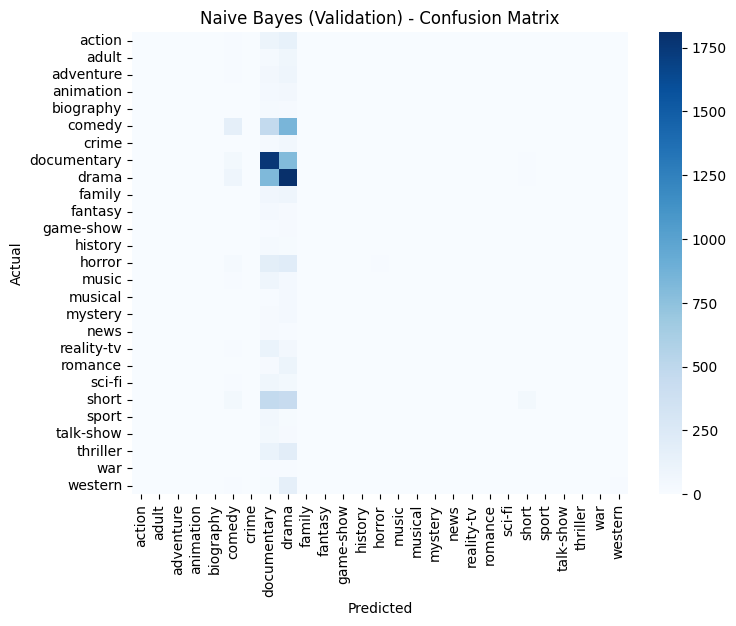

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate(name, model, Xt, yt):
    preds = model.predict(Xt)
    print(f"\n=== {name} ===")
    print("Accuracy:", round(accuracy_score(yt, preds), 4))
    print(classification_report(yt, preds))

    # Confusion matrix
    cm = confusion_matrix(yt, preds, labels=sorted(yt.unique()))
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=False, cmap="Blues",
                xticklabels=sorted(yt.unique()),
                yticklabels=sorted(yt.unique()))
    plt.title(f"{name} - Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# Evaluate both models
evaluate("Logistic Regression (Validation)", lr, X_val_tfidf, y_val)
evaluate("Naive Bayes (Validation)", nb, X_val_tfidf, y_val)

In [11]:
# Pick the better model (using Logistic Regression here)
test_preds = lr.predict(X_test_tfidf)

# Add predictions to test_df
test_df['predicted_genre'] = test_preds

# Evaluate only on rows that have a true genre (solution file gave us this)
mask = test_df['genre'].notna()

print("=== Test Set Evaluation ===")
print("Accuracy:", round(accuracy_score(test_df.loc[mask, 'genre'], test_df.loc[mask, 'predicted_genre']), 4))
print("\nClassification Report:")
print(classification_report(test_df.loc[mask, 'genre'], test_df.loc[mask, 'predicted_genre']))

=== Test Set Evaluation ===
Accuracy: 0.0

Classification Report:


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [12]:
print("Train genres:", sorted(train_df['genre'].unique())[:20])
print("Test genres:", sorted(test_df['genre'].dropna().unique())[:20])

Train genres: ['action', 'adult', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'game-show', 'history', 'horror', 'music', 'musical', 'mystery', 'news', 'reality-tv', 'romance']
Test genres: ['"#Elmira" (2014)', '"#HoodDocumentary" (2016)', '"#MonologueWars" (2014)', '"#NotMadMonday" (2015)', '"#ScenesFromRussia" (2013)', '"#TanCosmo" (2014)', '"#TheWestbrooks" (2015)', '"$2 Donuts" (2017)', '"$24 in 24" (2012)', '"*Loosely Exactly Nicole" (2016)', '"+27: Social Innovators of South Africa" (2014)', '"0511 Sondersendung zu Theaterformen" (2007)', '"1 Day with..." (2004)', '"1 Habit" (2015)', '"1 Kadin 1 Erkek" (2008)', '"1 Week to Fly" (2018)', '"1 vs. 100" (2010)', '"10 Finnish Architects: An Outsider\'s View" (2003)', '"10 Million Dollar Bigfoot Bounty" (2014)', '"10 Things That Make Me Happy" (2012)']


In [13]:
train_df['yes
genre'] = train_df['genre'].str.lower().str.strip()
test_df['genre']  = test_df['genre'].str.lower().str.strip()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Check genres before cleaning
print("BEFORE Cleaning")
print("Train genres (sample):", sorted(train_df['genre'].unique())[:20])
print("Test genres (sample):", sorted(test_df['genre'].dropna().unique())[:20])

# 2. Normalize genre labels
train_df['genre'] = train_df['genre'].str.lower().str.strip()
test_df['genre']  = test_df['genre'].str.lower().str.strip()

print("\nAFTER Cleaning")
print("Unique train genres:", len(train_df['genre'].unique()))
print("Unique test genres:", len(test_df['genre'].unique()))

# 3. Re-train with cleaned genres
X = train_df['clean_text']
y = train_df['genre']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2), stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf   = tfidf.transform(X_val)
X_test_tfidf  = tfidf.transform(test_df['clean_text'])

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_tfidf, y_train)

# 4. Evaluate again on test set
test_preds = lr.predict(X_test_tfidf)
test_df['predicted_genre'] = test_preds

mask = test_df['genre'].notna()
print("\n=== Test Set Evaluation (After Cleaning) ===")
print("Accuracy:", round(accuracy_score(test_df.loc[mask,'genre'], test_df.loc[mask,'predicted_genre']), 4))
print("\nClassification Report:")
print(classification_report(test_df.loc[mask,'genre'], test_df.loc[mask,'predicted_genre'], zero_division=0))


BEFORE Cleaning
Train genres (sample): ['action', 'adult', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'game-show', 'history', 'horror', 'music', 'musical', 'mystery', 'news', 'reality-tv', 'romance']
Test genres (sample): ['"#elmira" (2014)', '"#hooddocumentary" (2016)', '"#monologuewars" (2014)', '"#notmadmonday" (2015)', '"#scenesfromrussia" (2013)', '"#tancosmo" (2014)', '"#thewestbrooks" (2015)', '"$2 donuts" (2017)', '"$24 in 24" (2012)', '"*loosely exactly nicole" (2016)', '"+27: social innovators of south africa" (2014)', '"0511 sondersendung zu theaterformen" (2007)', '"1 day with..." (2004)', '"1 habit" (2015)', '"1 kadin 1 erkek" (2008)', '"1 vs. 100" (2010)', '"1 week to fly" (2018)', '"10 finnish architects: an outsider\'s view" (2003)', '"10 million dollar bigfoot bounty" (2014)', '"10 things that make me happy" (2012)']

AFTER Cleaning
Unique train genres: 27
Unique test genres: 54195

=== Test Set Evaluation (Af

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
/Libra

In [15]:
# Debug test solution raw lines
sol_path = DATA_DIR / "test_data_solution.txt"
with open(sol_path, "r", encoding="utf-8") as f:
    for i in range(5):
        print(f.readline())

1 ::: Edgar's Lunch (1998) ::: thriller ::: L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.

2 ::: La guerra de papá (1977) ::: comedy ::: Spain, March 1964: Quico is a very naughty child of three belonging to a wealthy middle-class family. Since Cristina's birth, he feels he has lost the privileged position of "prince" of the house for his eight months old sister. So, with his brother Juan, who is eight years old and is quite disobedient, spend their time committing prank after prank, causing the resulting anger of his mother, the 